# Section 0. References

[1] https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test <br/>
[2] http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu. <br/>
[3] http://ggplot.yhathq.com/


# Section 1. Statistical Test

###1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?
I have used the Mann-Whitney U-statistic to compare the number of entries with rain and the number of entries without rain. Because the Mann-Whitney U-statistic aims to consider if the difference of the median is statistically different, I used the two tail P value with a critical p value = 0.05. The null hypothesis is that the two groups are sampled from the same distribution. 

###1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.
The ridership of the NYC subwaydata does not seem to be normally distributed. So I have used the Mann-Whitney U-statistic , which aims to compare two population with a non-parametric method. The Mann-Whitney U-statistic has some assumptions. It assumes that the sample is randomly selected from the distribution and the sample and the group are independent. And the dependent variables are ordinal or continuous.

###1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.
P value of the test is 0.049999825587, which means that the the difference of two samples is statistically significant because we set the critical p value 0.05. And the means of the number of entries with rain and the number of entries without rain are 1105.4463767458733, 1090.278780151855. 

###1.4 What is the significance and interpretation of these results?
I have compared the number of entries with rain and the number of entries without rain, which aims to test the ridership based on raining. I have tested it with 95 % significance intervals. the P value of the test is 0.04999, which means that the the difference of two samples is statistically significant.
 

# Section 2. Linear Regression

###2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:
I have used OLS using Statsmodels to build a prediction model for ENTRIESn_hourly data.

###2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?
I have used a set of constant, 'rain', 'Hour', 'fog','meantempi','mintempi'. But I have used a dummy variable of 'UNIT'. 

###2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that the selected features will contribute to the predictive power of your model.
I have selected input variables, which improved my R2 value from the basic settings. In addition, I thought that 'fog' and 'mintempi' features seems to change the decision on whether outside people might decide to use the subway more. And the feature selection resulted in R2 improvement.

###2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?
The following is a list of coefficients:

const       1572.5720    
rain          14.2573     
Hour          65.3414     
fog          194.6285     
meantempi     10.9154      
mintempi     -25.5348

###2.5 What is your model’s R2 (coefficients of determination) value?
My model's R2 is 0.48.

###2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?
The R squared value means the ratio of explained variation over total variation. The R2 = 0.48 for our model means that 
this linear model seems to predict 48% of total variation of the data. It is hard to say that the model can predict ridership with high precision. However, we can explain relation between ridership and parameters with R = 0.48.


# Section 3. Visualization

Please include two visualizations that show the relationships between two or more variables in the NYC subway data.
Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure.
###3.1 One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.

c:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


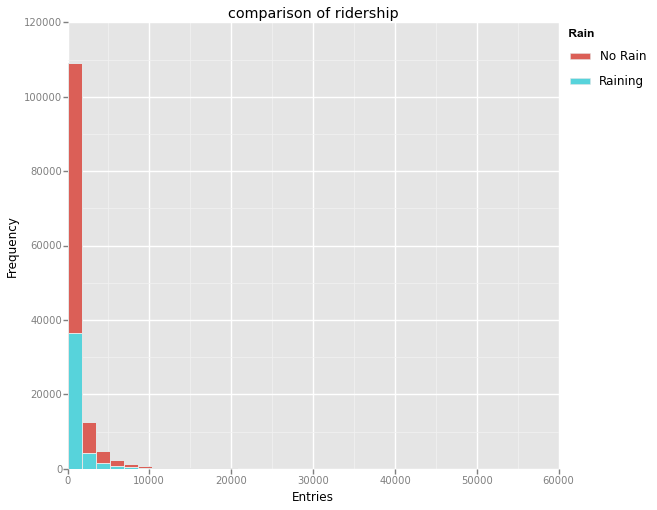

<ggplot: (151706312)>

In [83]:
%matplotlib inline

import pandas as pd
from ggplot import *

turnstile_weather = pd.read_csv('turnstile_data_master_with_weather.csv')
df = turnstile_weather[['ENTRIESn_hourly','rain']]
df['Rain'] = pd.Series(["Raining" if x == 1 else "No rain" for x in df.loc[:,'rain']]) 

ggplot(df, aes(x ='ENTRIESn_hourly', fill = 'Rain')) + geom_bar(stat= 'bin') + ggtitle('comparison of ridership') \
+ xlab('Entries') +ylab('Frequency')



The bar plot shows the average of ENTRIESn_hourly for rainy days (x = 1) and non-rainy days (x = 0). The difference between two group does not seem to be significant. The 'rain' feature might not be a critical feature to determine ridership of the NYC subway.

### 3.2 One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like.

[datetime.datetime(1900, 1, 1, 0, 0), datetime.datetime(1900, 1, 1, 0, 0), datetime.datetime(1900, 1, 1, 0, 0), datetime.datetime(1900, 1, 1, 0, 0), datetime.datetime(1900, 1, 1, 0, 0), datetime.datetime(1900, 1, 1, 0, 0), datetime.datetime(1900, 1, 1, 0, 0)]
         Day  ENTRIESn_hourly  Day_n
1     Monday         24130096      0
5    Tuesday         22997954      1
6  Wednesday         23562636      2
4   Thursday         23486649      3
0     Friday         23130773      4
2   Saturday         14044105      5
3     Sunday         13180114      6


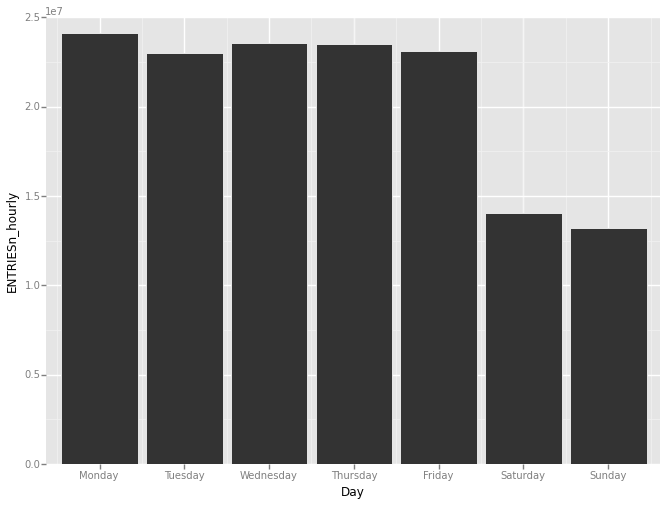

<ggplot: (58101312)>


In [84]:
from datetime import *
import time

df = turnstile_weather.iloc[:,[2,6]]
df1 = df.groupby('DATEn', as_index = False).sum()
df1['Day'] = pd.Series([datetime.strptime(x, '%Y-%m-%d').strftime('%A') for x in df1['DATEn']]) 
df2 = df1.groupby('Day',as_index = False).sum()
print [datetime.strptime(x, '%A') for x in df2['Day']]

df2['Day_n'] = pd.Series([time.strptime(x, '%A').tm_wday for x in df2['Day']]) 
df2.sort('Day_n', inplace = True)

print df2
plot = ggplot(df2, aes(x = 'Day',y='ENTRIESn_hourly')) + geom_bar(stat= 'identity')
print plot


The bar plot shows the ridership of NYC subway in terms of days. It indicates that weekdays' ridership is higher than weekends' ridership. 

# Section 4. Conclusion

Please address the following questions in detail. Your answers should be 1-2 paragraphs long.
###4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?  
We can expect that more people use NYC subway when it rains.

###4.2 What analyses lead you to this conclusion? You should use results from both your statistical tests and your linear regression to support your analysis.
We can assume that there is changes of ridership of the NYC subway in case of raininig from statistical tests. The analysis and interpretation show that difference in ridership in terms of 'rain' feature is statistically significant. And the linear regression shows the relation between raining and ridership, which presents that more people use NYC subway when it rains.


# Section 5. Reflection

###5.1 Please discuss potential shortcomings of the methods of your analysis, including:
I have not investigated the interaction between features in my analysis. Raining seems to be a critical feature and we may need to investigate interaction with other features. The statistical analysis only considers the effect of raining not considering other conditions and the linear model only considers effects of main features. If we take a look at effects of interaction terms, the result would be more robust. And it is suspicious that the data is too large to estimate the effect of raining on ridership. When I have tested the ridership of the NYC subway in terms of raining with  Mann-Whitney U-statistic, the results indicates that raining is a significant feature. However coefficient of 'rain' feature in the linear regression model also has the p value = 0.54. This seems that the large number of data to estimate raining effect might have narrowed variance of raining and resulted in the conclusion that raining is a significant feature. Therefore, we may need to classify the data in terms to other parameters for detailed analysis. For example, we can narrow down the data set in terms of 'UNIT' or 'TIMEn'.


